<a href="https://colab.research.google.com/github/Deepak-Mewada/Udemy-TensorFlowDeveloperCertificate_ZerotoMastery/blob/main/%600_time_series_forcasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series forcasting fundamentals with Tensorflow + Project

Predict the price of bitcoin from the historical price of bitcoins

## Get Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-12-09 16:51:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-12-09 16:51:56 (5.80 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



# Importing time series with pandas

In [ ]:
# import pandas
import pandas as pd

In [ ]:
df= pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                parse_dates= ["Date"],
                index_col = ["Date"]  # parse the date column and tell pandas column 1 is a datetime
                )
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
#How many samples do we have?
len(df)

2787

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
#Only want the closing price column for each day

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


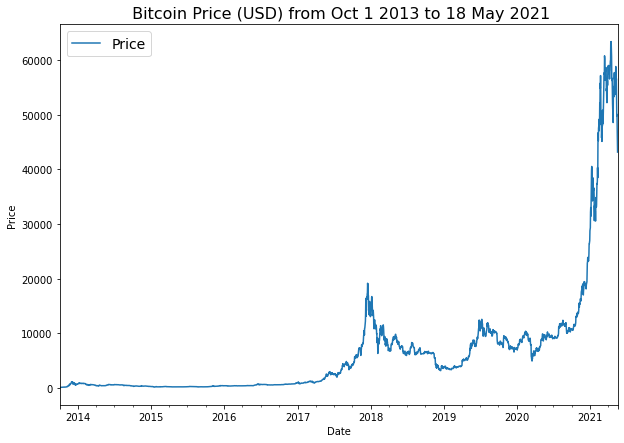

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("Price")
plt.title(" Bitcoin Price (USD) from Oct 1 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=14)

# Importing time series data with Pythons's CSV Module

In [ ]:
# Importing an dformating historical Bitcoin data with Python
import csv
from datetime import datetime


In [ ]:
timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
   csv_reader = csv.reader(f,delimiter=",")
   next(csv_reader)
   for line in csv_reader:
     #timesteps.append(line[1]) #get the date as dates not strings 
     timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
     btc_price.append(float(line[2])) 

In [ ]:
# View first 10 of each

timesteps[:5], btc_price[:5]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0)],
 [123.65499, 125.455, 108.58483, 118.67466, 121.33866])

Text(0.5, 0, 'Date')

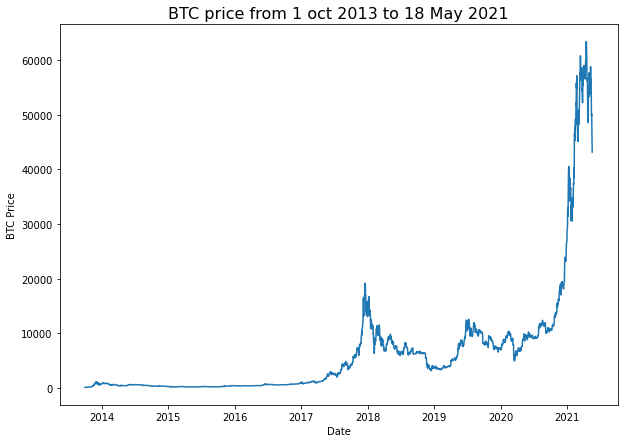

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)

plt.ylabel("BTC Price")
plt.title("BTC price from 1 oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
#plt.legend(fontsize=16)

# Format data part 1: Create train and test sets of our time seires data

### Create train and test set of our Time series data

In [ ]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
# Get bitcoindata array
timesteps = bitcoin_prices.index.to_numpy()

prices    = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# wrong way to make train/test  split for time series data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

## Let's creat train and test dataset the right way

In [ ]:
#Create train and test splits the right way for time series data
split_size= int(0.8* len(prices))

#Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

#Create test data splits
X_test, y_test   = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

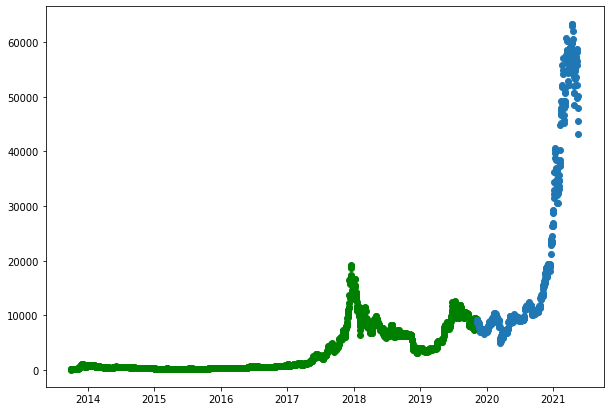

In [ ]:
#Plot the correctly made splits

plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c='green' )
plt.scatter(X_test,y_test)


# Create a plotting function

Typin gplotting function is terdious so let's functionize it

In [ ]:
#Create a fucntion to plot time series data

def plot_time_series(timesteps, values, formet=".", start=-0, end=None, label=None):

  #Plot the series
  plt.plot(timesteps[start:end], values[start:end],formet, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")

  if label:
    plt.legend(fontsize=14) #make lable bigger
  plt.grid(True)  

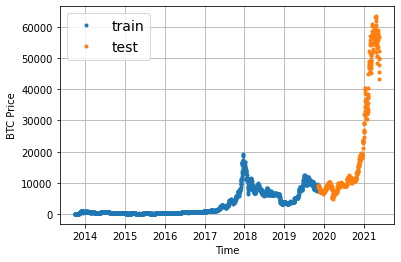

In [ ]:
plot_time_series(X_train, y_train, formet="." ,label="train")
plot_time_series(X_test,y_test, label="test")

# Modeling Experiments
**Horizon** : number of times in the future we are going to predict

**Window size** : number of time steps we are going to use to predict horizon

* 0 Naive

* 1 Dense, horizon =1, window=7

* 2 Same as 1, horizon =1 , window=30

* 3 Same as 1, horizon= 7 ,windown 30

* 4 Conv1d

* 5 LSTM

* 6 Same a s 1 (multivariate)

* N-BEATs Algorithm

* Ensemble 

* Future prediction model

* Same as 1


## Modle 0 : Naive forcast (baseline)

$$\hat{y}_t = y_{t-1} $$

In [ ]:
# Create a naive forecast 
naive_forcast = y_test[:-1]

naive_forcast[:10], naive_forcast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

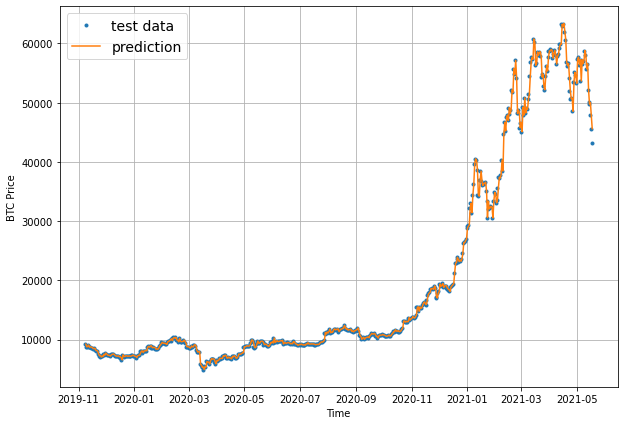

In [ ]:
plt.figure(figsize=(10,7))

#plot_time_series(timesteps=X_train,values=y_train,label="train data")
plot_time_series(timesteps=X_test, values=y_test, label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forcast,formet="-",label="prediction")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forasting.

We're predicting a number so that means we have form of a regression problem

Because we're working on a regression problem, we'll need some regressom-like metrics.



In [ ]:
import tensorflow as tf

In [ ]:
#MASE implementation
def mean_absolute_scaled_error(y_true,y_pred):
  mae= tf.reduce_mean(tf.abs(y_true-y_pred))

  #Find MAE of naive forcast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # our seasonality is one day

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forcast).numpy()

0.9995699939182624

In [ ]:
#Create a function to taker in model predictions and truth values and return vealuation matrics
def evaluate_preds(y_true,y_pred):
  # make sure float32 datatytpe (for metric calculations)
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  #claculatevarious evaluation metrics
  mae  = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse  = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return { "mae" : mae.numpy(),
           "mse" : mse.numpy(),
           "rmse": rmse.numpy(),
           "mape": mape.numpy(),
           "mase": mase.numpy()     
       }

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                              y_pred=naive_forcast 
                              )
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

# Other model you can use for baselines and for actual forecasts

## Windowing Dataset

In [ ]:
HORIZON = 1 
WINDOW_SIZE =7

In [ ]:
# create fucntion to label windowed data
def get_labelled_window(x, horizon = HORIZON):
  